In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Data/train.csv',header = 0)
df2 = pd.read_csv('Data/test.csv',header = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [4]:
Model_year = {'P': 1993, 'W': 1998, 'X': 1999, 'Y': 2000, '2': 2002, '8': 2008, 'A': 2010, 'B': 2011, 'C': 2012, 'D': 2013, 'E': 2014, 'F': 2015, 'G': 2016, 'H': 2017, 'I': 2018, 'J': 2019, 'K': 2020, 'L': 2021, 'M': 2022}
df[(df['Model Year'].isnull())]

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
18618,EV258,KMHE34L17G,Spokane,SPOKANE VALLEY,WA,99016.0,NaN,HYUNDAI,SONATA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,27,34600,4.0,476776030,POINT (-117.152872 47.645579),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,16.365
34663,EV255,5YJ3E1EB6K,King,SEATTLE,WA,98115.0,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,46.0,192220731,POINT (-122.297534 47.685291),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),57
35578,EV250,5YJSA1CP9D,Clark,VANCOUVER,WA,98683.0,NaN,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,17.0,193870848,POINT (-122.510748 45.603727),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,33.89
50803,EV252,5YJYGDEF0L,Chelan,WENATCHEE,WA,98801.0,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,12.0,127404371,POINT (-120.336499 47.425146),PUD NO 1 OF CHELAN COUNTY,72
54860,EV249,WAUTPBFF2G,Snohomish,EDMONDS,WA,98026.0,NaN,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,21.0,165842008,POINT (-122.333046 47.829439),PUGET SOUND ENERGY INC,18.86
59409,EV256,5YJ3E1EB0M,Clark,CAMAS,WA,98607.0,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,18.0,169660508,POINT (-122.408498 45.620943),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,64
62552,EV253,5YJ3E1EA2M,King,SEATTLE,WA,98144.0,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,37.0,150168735,POINT (-122.30033 47.585339),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),64


In [5]:
l=df[(df['Model Year'].isnull())].index

In [6]:
j = [df.iloc[i]['VIN (1-10)'][-1] for i in l]

In [7]:
k=0
for i in l:
    df['Model Year'].iloc[i] = Model_year[j[k]]
    k+=1

C:\Users\PIYUSH KARMHE\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
df[(df['Model Year'].isnull())].index

Int64Index([], dtype='int64')

In [9]:
zip1 = {'POINT (-122.374864 47.548552)': 98126, 'POINT (-122.212105 47.792368)': 98021,'POINT (-122.029605 47.939428)': 98290, 'POINT (-122.534497 47.643688)': 98110, 'POINT (-117.166513 32.746633)': 92103, np.nan:np.nan}
zip2 = {'SEATTLE': 98107, 'SPOKANE VALLEY': 99037, 'nan':''}

In [10]:
l = df[(df['ZIP Code'].isnull())].index

In [11]:
j = [df.iloc[i]['Vehicle Location'] for i in l]

In [12]:
k=0
for i in l:
    df['ZIP Code'].iloc[i] = zip1[j[k]]
    k+=1

In [13]:
l = df[(df['ZIP Code'].isnull())].index

In [14]:
j = [df.iloc[i]['City'] for i in l]

In [15]:
k=0
for i in l:
    df['ZIP Code'].iloc[i] = zip2[j[k]]
    k+=1

In [16]:
df['ZIP Code'].iloc[l[0]]

99037.0

In [17]:
l = df2[(df2['ZIP Code'].isnull())].index

In [18]:
j = [df2.iloc[i]['Vehicle Location'] for i in l]

In [19]:
k=0
for i in l:
    try:
        df2['ZIP Code'].iloc[i] = zip1[j[k]]
    except:
        pass
    k+=1

In [20]:
l=df2[(df2['Model Year'].isnull())].index

In [21]:
j = [df2.iloc[i]['VIN (1-10)'][-1] for i in l]

In [22]:
k=0
for i in l:
    df2['Model Year'].iloc[i] = Model_year[j[k]]
    k+=1

In [23]:
Make = {'LEAF': 'NISSAN', 'MODEL 3': 'TESLA', 'NIRO': 'KIA', 'SORENTO': 'KIA'}

In [24]:
l = df[(df['Make'].isnull())].index

In [25]:
j = [df.iloc[i]['Model'] for i in l]

In [26]:
j

['LEAF', 'MODEL 3', 'NIRO', 'SORENTO']

In [27]:
k=0
for i in l:
    df['Make'].iloc[i] = Make[j[k]]
    k+=1

In [28]:
l = df2[(df2['Make'].isnull())].index

In [29]:
j = [df2.iloc[i]['Model'] for i in l]

In [30]:
j

['LEAF', 'MODEL 3', 'MODEL 3']

In [31]:
k=0
for i in l:
    df2['Make'].iloc[i] = Make[j[k]]
    k+=1

In [32]:
Model = {'1FMC': 'ESCAPE'}

In [33]:
l = df[(df['Model'].isnull())].index

In [34]:
df.iloc[l[0]]['VIN (1-10)']

'1FMCU0LZ4N'

In [35]:
df.iloc[l[0]]['VIN (1-10)'][:4]

'1FMC'

In [36]:
j = [df.iloc[i]['VIN (1-10)'][:4] for i in l]

In [37]:
k=0
for i in l:
    df['Model'].iloc[i] = Model[j[k]]
    k+=1

In [38]:
l = df2[(df2['Model'].isnull())].index

In [39]:
j = [df2.iloc[i]['VIN (1-10)'][:4] for i in l]

In [40]:
k=0
for i in l:
    df2['Model'].iloc[i] = Model[j[k]]
    k+=1

In [41]:
state = {'EDMONDS': 'WA', 'CHUGIAK': 'AK','LACEY': 'WA','BOTHELL': 'WA','SEATTLE': 'WA', 'BAINBRIDGE ISLAND': 'WA', 'YAKIMA': 'WA', 'VASHON': 'WA', 'BREMERTON': 'WA', 'SAN DIEGO': 'CA'}

In [42]:
l = df2[(df2['State'].isnull())].index

In [43]:
j = [df2.iloc[i]['City'] for i in l]

In [44]:
k=0
for i in l:
    df2['State'].iloc[i] = state[j[k]]
    k+=1

In [45]:
l = df[(df['State'].isnull())].index

In [46]:
j = [df.iloc[i]['City'] for i in l]

In [47]:
k=0
for i in l:
    df['State'].iloc[i] = state[j[k]]
    k+=1

In [48]:
city_train = {98052: 'REDMOND', 98502: 'OLYMPIA', 98346: 'KINGSTON', 98312: 'BREMERTON', 98513: 'OLYMPIA', 98908: 'YAKIMA', 98008: 'BELLEVUE'}

In [49]:
l = df[(df['City'].isnull())].index

In [50]:
j = [df.iloc[i]['ZIP Code'] for i in l]

In [51]:
k=0
for i in l:
    df['City'].iloc[i] = city_train[j[k]]
    k+=1

In [52]:
city_test = {98370: 'POULSBO', 98107: 'SEATTLE', 98019: 'DUVALL'}

In [53]:
l = df2[(df2['City'].isnull())].index

In [54]:
j = [df2.iloc[i]['ZIP Code'] for i in l]

In [55]:
k=0
for i in l:
    df2['City'].iloc[i] = city_test[j[k]]
    k+=1

In [56]:
county_train = {'APO': 'Houdson', 'FPO': 'SouthWest'}

In [57]:
l = df[(df['County'].isnull())].index

In [58]:
j = [df.iloc[i]['City'] for i in l]

In [59]:
k=0
for i in l:
    df['County'].iloc[i] = county_train[j[k]]
    k+=1

In [60]:
county_test = {9753: 'Hudson', 96319: 'SouthWest', 96530: 'SouthWest', 96620: 'SouthWest'}

In [61]:
l = df2[(df2['County'].isnull())].index

In [62]:
j = [df2.iloc[i]['ZIP Code'] for i in l]

In [63]:
k=0
for i in l:
    df2['County'].iloc[i] = county_test[j[k]]
    k+=1

In [64]:
l=df[(df['Expected Price ($1k)']=='N/')].index

In [65]:
for i in l:
    df=df.drop([i],axis=0)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64340 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64340 non-null  object 
 1   VIN (1-10)                                         64340 non-null  object 
 2   County                                             64340 non-null  object 
 3   City                                               64340 non-null  object 
 4   State                                              64340 non-null  object 
 5   ZIP Code                                           64340 non-null  float64
 6   Model Year                                         64340 non-null  float64
 7   Make                                               64340 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [67]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27580 entries, 0 to 27579
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 27580 non-null  object 
 1   VIN (1-10)                                         27580 non-null  object 
 2   County                                             27580 non-null  object 
 3   City                                               27580 non-null  object 
 4   State                                              27580 non-null  object 
 5   ZIP Code                                           27578 non-null  float64
 6   Model Year                                         27580 non-null  float64
 7   Make                                               27580 non-null  object 
 8   Model                                              27580 non-null  object 
 9   Electr

In [68]:
df = df.drop(['Electric Utility', 'Legislative District', 'Vehicle Location', 'DOL Vehicle ID', 'VIN (1-10)', 'ID'], axis = 1)

In [69]:
df.head()

,County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Expected Price ($1k)
0,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,50
1,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15
2,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,18
3,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,33.9
4,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.78


In [70]:
id=df2['ID']
df2 = df2.drop(['Electric Utility', 'Legislative District', 'Vehicle Location', 'DOL Vehicle ID', 'VIN (1-10)', 'ID'], axis = 1)

In [71]:
df2.head()

,County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,Jefferson,PORT TOWNSEND,WA,98368.0,2012.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0
1,King,ISSAQUAH,WA,98029.0,2021.0,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
2,Pierce,PUYALLUP,WA,98372.0,2018.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0
3,Pierce,TACOMA,WA,98403.0,2021.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0
4,Kitsap,BREMERTON,WA,98312.0,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0


In [72]:
df['Expected Price ($1k)'] = pd.to_numeric(df['Expected Price ($1k)'], downcast='float')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64340 entries, 0 to 64352
Data columns (total 12 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   County                                             64340 non-null  object 
 1   City                                               64340 non-null  object 
 2   State                                              64340 non-null  object 
 3   ZIP Code                                           64340 non-null  float64
 4   Model Year                                         64340 non-null  float64
 5   Make                                               64340 non-null  object 
 6   Model                                              64340 non-null  object 
 7   Electric Vehicle Type                              64340 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  64340 non-null  object 
 9   Electr

In [74]:
df.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Expected Price ($1k)
count,64340.000000,64340.000000,64340.000000,64340.000000,64340.000000
mean,98143.413025,2018.185483,106.962916,2525.500933,45.447681
std,2856.215294,2.726549,104.099820,12404.096135,24.728851
min,745.000000,1993.000000,0.000000,0.000000,0.000000
25%,98052.000000,2017.000000,14.000000,0.000000,22.857000
50%,98121.000000,2018.000000,73.000000,0.000000,40.000000
75%,98370.000000,2021.000000,215.000000,0.000000,65.900002
max,99701.000000,2022.000000,337.000000,845000.000000,1100.000000


<AxesSubplot:xlabel='Expected Price ($1k)'>

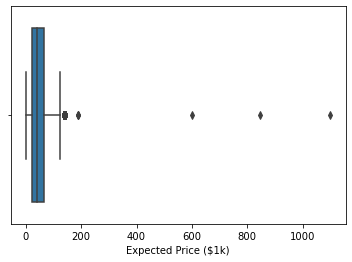

In [75]:
sns.boxplot(x=df['Expected Price ($1k)'])

In [76]:
uv = np.nanpercentile(df['Expected Price ($1k)'], [99])[0]

In [77]:
df['Expected Price ($1k)'][(df['Expected Price ($1k)']>uv)] = uv

<ipython-input-77-c1974d18eb15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Expected Price ($1k)'][(df['Expected Price ($1k)']>uv)] = uv


<AxesSubplot:xlabel='Expected Price ($1k)'>

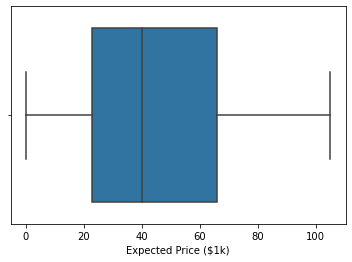

In [78]:
sns.boxplot(x=df['Expected Price ($1k)'])

<AxesSubplot:xlabel='Base MSRP'>

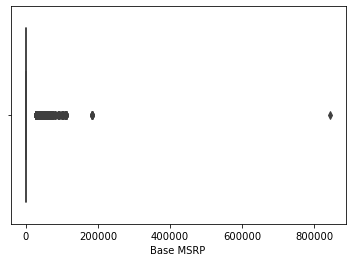

In [79]:
sns.boxplot(x=df['Base MSRP'])

In [80]:
uv = np.nanpercentile(df['Base MSRP'], [99])[0]*2

In [81]:
df['Base MSRP'][(df['Base MSRP']>uv)] = uv

<ipython-input-81-b9431b62445c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Base MSRP'][(df['Base MSRP']>uv)] = uv


<AxesSubplot:xlabel='Base MSRP'>

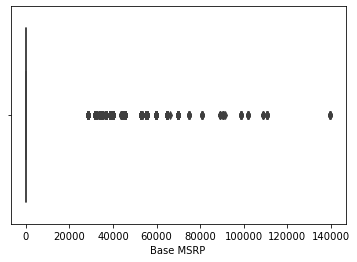

In [82]:
sns.boxplot(x=df['Base MSRP'])

In [83]:
df.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Expected Price ($1k)
count,64340.000000,64340.000000,64340.000000,64340.000000,64340.000000
mean,98143.413025,2018.185483,106.962916,2508.301679,45.163029
std,2856.215294,2.726549,104.099820,11879.876330,23.261318
min,745.000000,1993.000000,0.000000,0.000000,0.000000
25%,98052.000000,2017.000000,14.000000,0.000000,22.857000
50%,98121.000000,2018.000000,73.000000,0.000000,40.000000
75%,98370.000000,2021.000000,215.000000,0.000000,65.900002
max,99701.000000,2022.000000,337.000000,139800.000000,105.000000


In [84]:
df.corr()

,ZIP Code,Model Year,Electric Range,Base MSRP,Expected Price ($1k)
ZIP Code,1.000000,-0.003765,-0.010227,-0.000150,-0.006954
Model Year,-0.003765,1.000000,-0.080465,-0.226949,0.570594
Electric Range,-0.010227,-0.080465,1.000000,0.056520,0.238468
Base MSRP,-0.000150,-0.226949,0.056520,1.000000,-0.127201
Expected Price ($1k),-0.006954,0.570594,0.238468,-0.127201,1.000000


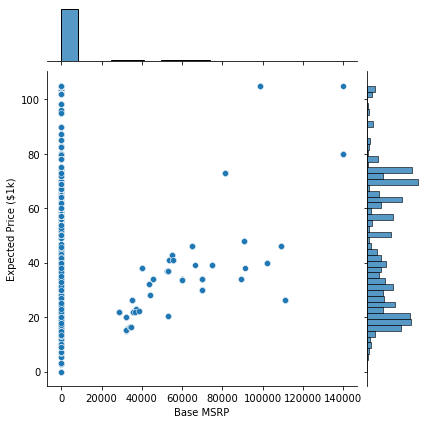

In [85]:
sns.jointplot(x='Base MSRP', y='Expected Price ($1k)', data = df)

In [86]:
t=df.drop('Expected Price ($1k)', axis=1)
t=t.append(df2)
t.head()

,County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP
0,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0
1,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0
2,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0
3,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0
4,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0


In [87]:
y = df['Expected Price ($1k)']
x = df.drop('Expected Price ($1k)', axis = 1)

In [88]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = ['County', 'City', 'State', 'ZIP Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']
for col in cols:
    le.fit(t[col])
    x[col] = le.transform(x[col]) 
    print(le.classes_)

['Adams' 'Alameda' 'Albemarle' 'Alexandria City' 'Allegheny' 'Anchorage'
 'Anne Arundel' 'Asotin' 'Baltimore' 'Bartow' 'Bay' 'Bell' 'Benton'
 'Bexar' 'Boone' 'Bradley' 'Bryan' 'Caddo' 'Calvert' 'Camden' 'Carroll'
 'Carson City' 'Charles' 'Chaves' 'Chelan' 'Chesapeake City' 'Clackamas'
 'Clallam' 'Clark' 'Columbia' 'Coryell' 'Cowlitz' 'Cumberland'
 'Danville City' 'Davidson' 'Dekalb' 'Denton' 'District Of Columbia'
 'Douglas' 'Dupage' 'Duval' 'El Paso' 'Erie' 'Fairbanks North Star'
 'Fairfax' 'Ferry' 'Flathead' 'Franklin' 'Frederick' 'Fresno' 'Garfield'
 'Glacier' 'Goochland' 'Grant' 'Grays Harbor' 'Greene' 'Guadalupe'
 'Hamilton' 'Harris' 'Harrison' 'Hennepin' 'Hidalgo' 'Hillsborough'
 'Honolulu' 'Houdson' 'Howard' 'Hudson' 'Humacao' 'Island' 'Jefferson'
 'Kent' 'Kern' 'King' 'Kings' 'Kitsap' 'Kittitas' 'Klamath' 'Klickitat'
 'Lake' 'Laramie' 'Leavenworth' 'Lewis' 'Liberty' 'Lincoln' 'Los Angeles'
 'Manassas City' 'Maricopa' 'Marin' 'Mason' 'Mecklenburg' 'Monterey'
 'Montgomery' 'Moore

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [91]:
r2_score(y_train, lm.predict(x_train))

0.5827477810972661

In [92]:
r2_score(y_test, lm.predict(x_test))

0.5699576027911194

In [93]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(x_train, y_train)
r2_score(y_test, regressor.predict(x_test))

0.998556478870423

In [94]:
r2_score(y_train, regressor.predict(x_train))

1.0

In [95]:
uv = np.nanpercentile(df2['Base MSRP'], [99])[0]*2

In [96]:
df2['Base MSRP'][(df2['Base MSRP']>uv)] = uv

<ipython-input-96-886a4ebc4be9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Base MSRP'][(df2['Base MSRP']>uv)] = uv


In [97]:
le = preprocessing.LabelEncoder()

In [98]:
cols = ['County', 'City', 'State', 'ZIP Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

In [99]:
for col in cols:
    le.fit(t[col])
    df2[col] = le.transform(df2[col]) 
    print(le.classes_)

['Adams' 'Alameda' 'Albemarle' 'Alexandria City' 'Allegheny' 'Anchorage'
 'Anne Arundel' 'Asotin' 'Baltimore' 'Bartow' 'Bay' 'Bell' 'Benton'
 'Bexar' 'Boone' 'Bradley' 'Bryan' 'Caddo' 'Calvert' 'Camden' 'Carroll'
 'Carson City' 'Charles' 'Chaves' 'Chelan' 'Chesapeake City' 'Clackamas'
 'Clallam' 'Clark' 'Columbia' 'Coryell' 'Cowlitz' 'Cumberland'
 'Danville City' 'Davidson' 'Dekalb' 'Denton' 'District Of Columbia'
 'Douglas' 'Dupage' 'Duval' 'El Paso' 'Erie' 'Fairbanks North Star'
 'Fairfax' 'Ferry' 'Flathead' 'Franklin' 'Frederick' 'Fresno' 'Garfield'
 'Glacier' 'Goochland' 'Grant' 'Grays Harbor' 'Greene' 'Guadalupe'
 'Hamilton' 'Harris' 'Harrison' 'Hennepin' 'Hidalgo' 'Hillsborough'
 'Honolulu' 'Houdson' 'Howard' 'Hudson' 'Humacao' 'Island' 'Jefferson'
 'Kent' 'Kern' 'King' 'Kings' 'Kitsap' 'Kittitas' 'Klamath' 'Klickitat'
 'Lake' 'Laramie' 'Leavenworth' 'Lewis' 'Liberty' 'Lincoln' 'Los Angeles'
 'Manassas City' 'Maricopa' 'Marin' 'Mason' 'Mecklenburg' 'Monterey'
 'Montgomery' 'Moore

In [100]:
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

In [101]:
p = regressor.predict(df2)

In [102]:
p

array([17., 43., 69., ..., 78., 20., 15.])

In [103]:
data = {
   'ID': id,
   'Expected Price ($1k)': p,
}

In [104]:
dataframe = pd.DataFrame(data)

In [105]:
dataframe.head()

,ID,Expected Price ($1k)
0,EV28368,17.0
1,EV27088,43.0
2,EV58989,69.0
3,EV6715,64.0
4,EV63251,73.0


In [106]:
dataframe.to_csv('evresult.csv', index=False)